# Construção da Base de Dados

## Tratamento dos Dados


### Importação das Bibliotecas e Acesso ao Google Drive


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importação do dataset Movies

In [2]:
df_movies = pd.read_csv('/content/drive/MyDrive/Sistema de Recomendação/movies.csv')
print(df_movies.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


### Remoção da coluna "title"

In [3]:
coluna_removida = 'title'
df_1 = df_movies.drop(coluna_removida, axis=1)
print(df_1.columns)

Index(['movieId', 'genres'], dtype='object')


### Importação do dataset Ratings

In [4]:
df_ratings = pd.read_csv('/content/drive/MyDrive/Sistema de Recomendação/ratings.csv')
print(df_ratings.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


### Remoção da coluna "timestamp"

In [5]:
coluna_removida = 'timestamp'
df_2 = df_ratings.drop(coluna_removida, axis=1)
print(df_1.columns)

Index(['movieId', 'genres'], dtype='object')


### Merge dos datasets "Movies" e "Ratings"

In [6]:
merged_df = pd.merge(df_1, df_2)
print(merged_df.columns)


Index(['movieId', 'genres', 'userId', 'rating'], dtype='object')


### Visualização das colunas

In [7]:
merged_df.head(10)

,movieId,genres,userId,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Adventure|Animation|Children|Comedy|Fantasy,17,4.5
5,1,Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Adventure|Animation|Children|Comedy|Fantasy,21,3.5
8,1,Adventure|Animation|Children|Comedy|Fantasy,27,3.0
9,1,Adventure|Animation|Children|Comedy|Fantasy,31,5.0


### Visualização de quantos filmes apresentam o gênero "children"

In [8]:
merged_df[merged_df["genres"] == "Children"]

,movieId,genres,userId,rating
9477,343,Children,6,3.0
9478,343,Children,43,4.0
9479,343,Children,307,1.5
9480,343,Children,429,3.0
9481,343,Children,600,3.0
31677,1426,Children,599,1.0
99759,152658,Children,448,1.5
100736,183301,Children,599,3.0


### Criação da coluna "is_children"

In [9]:
merged_df['is_children'] = merged_df['genres'].apply(lambda x: 1 if 'Children' in x else 0)


### Contagem da quantidade de filmes que possuiam "children" no gênero

In [10]:
merged_df['is_children'].value_counts()

0    91628
1     9208
Name: is_children, dtype: int64

### Eliminação das linhas que possuiam "children" no gênero

In [11]:
df = merged_df[merged_df["is_children"] != 1]
df

,movieId,genres,userId,rating,is_children
325,3,Comedy|Romance,1,4.0,0
326,3,Comedy|Romance,6,5.0,0
327,3,Comedy|Romance,19,3.0,0
328,3,Comedy|Romance,32,3.0,0
329,3,Comedy|Romance,42,4.0,0
...,...,...,...,...,...
100831,193581,Action|Animation|Comedy|Fantasy,184,4.0,0
100832,193583,Animation|Comedy|Fantasy,184,3.5,0
100833,193585,Drama,184,3.5,0
100834,193587,Action|Animation,184,3.5,0


In [12]:
df['is_children'].value_counts()

0    91628
Name: is_children, dtype: int64

### Remoção da coluna "genres"

In [13]:
coluna_removida = 'genres'
df = df.drop(coluna_removida, axis=1)
print(df.columns)

Index(['movieId', 'userId', 'rating', 'is_children'], dtype='object')


### Remoção da coluna "is_children"

In [14]:
coluna_removida = 'is_children'
df = df.drop(coluna_removida, axis=1)
print(df.columns)

Index(['movieId', 'userId', 'rating'], dtype='object')


## Transformação do Dataframe em arquivo csv

In [15]:
df.to_csv('Movies_tratados.csv',encoding='utf-8', index=False, header=True)


##Criação de Gráficos

In [16]:
import matplotlib.pyplot as plt

### Gráfico "Índice de Rating"

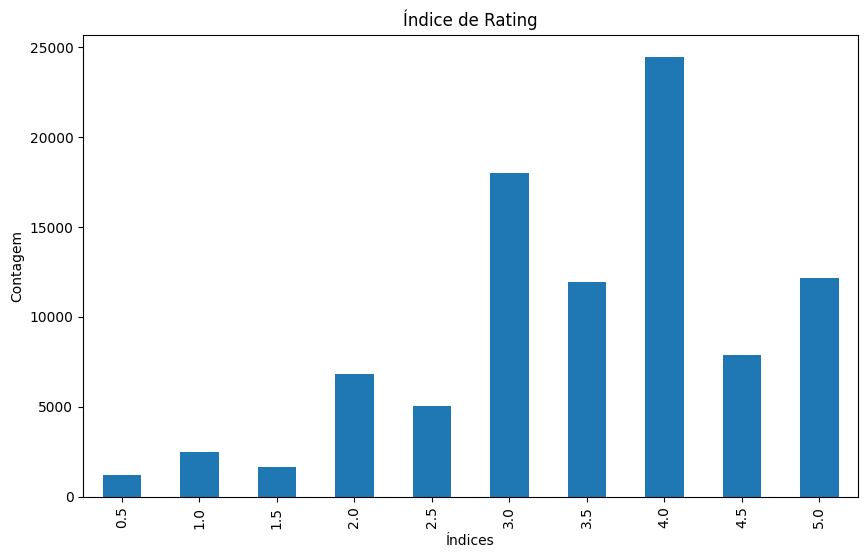

In [17]:

rating_counts = df['rating'].explode().value_counts()


rating_counts = rating_counts.sort_index()


plt.figure(figsize=(10, 6))
rating_counts.head(15).plot(kind='bar')
plt.xlabel('Índices')
plt.ylabel('Contagem')
plt.title('Índice de Rating')
plt.show()


### Gráfico "Índice de MovieId"

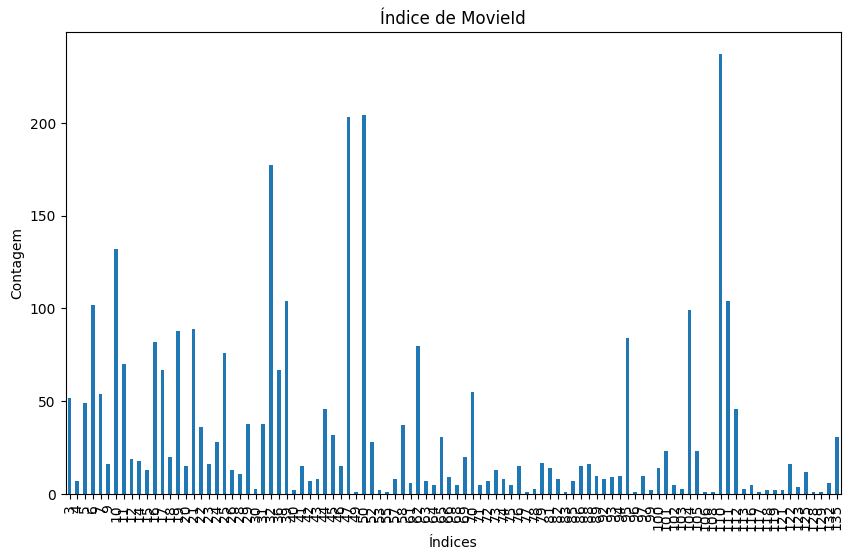

In [18]:

movieId_counts = df['movieId'].explode().value_counts()


movieId_counts = movieId_counts.sort_index()


plt.figure(figsize=(10, 6))
movieId_counts.head(100).plot(kind='bar')
plt.xlabel('Índices')
plt.ylabel('Contagem')
plt.title('Índice de MovieId')
plt.show()
